# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, we'll do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#reading the csv dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Netflix Movies and TV Shows Clustering - Prashant Gaikwad/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
df.head() #gives first five rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.info() #all information regarding dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.shape 

(7787, 12)

Dataframe consist of 7787 rows and 12 columns

# DATA CLEANING

In [7]:
#count the number of null values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
# Fill missing country entries with United States
df.fillna('Other', inplace=True)

# Change director, cast, country, and listed_in columns from type str to lists
df.director = df.director.str.split(', ').tolist()
df.cast = df.cast.str.split(', ').tolist()
df.country = df.country.str.split(', ').tolist()
df.listed_in = df.listed_in.str.split(', ').tolist()

In [9]:
#count the number of null values in each column
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Analysis of Movies vs TV Shows

In [10]:
netflix_shows = df[df['type']=="TV Show"] 
netflix_movie = df[df['type']=="Movie"] 

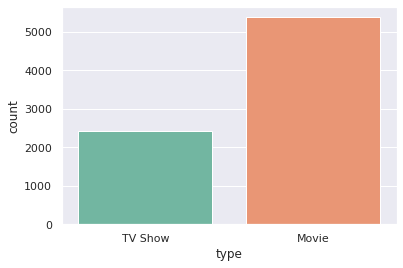

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

It is evident that there are more Movies on Netflix than TV shows.

In [12]:
old = df.sort_values("release_year", ascending=True)
old[['title','release_year']][:10]

,title,release_year
4867,Pioneers: First Women Filmmakers*,1925
6117,The Battle of Midway,1942
4960,Prelude to War,1942
7679,WWII: Report from the Aleutians,1943
7342,Undercover: How to Operate Behind Enemy Lines,1943
7616,Why We Fight: The Battle of Russia,1943
7268,Tunisian Victory,1944
6699,The Negro Soldier,1944
6657,The Memphis Belle: A Story of a\nFlying Fortress,1944
5371,San Pietro,1945


If a producer wants to release some content, which month must he do so?



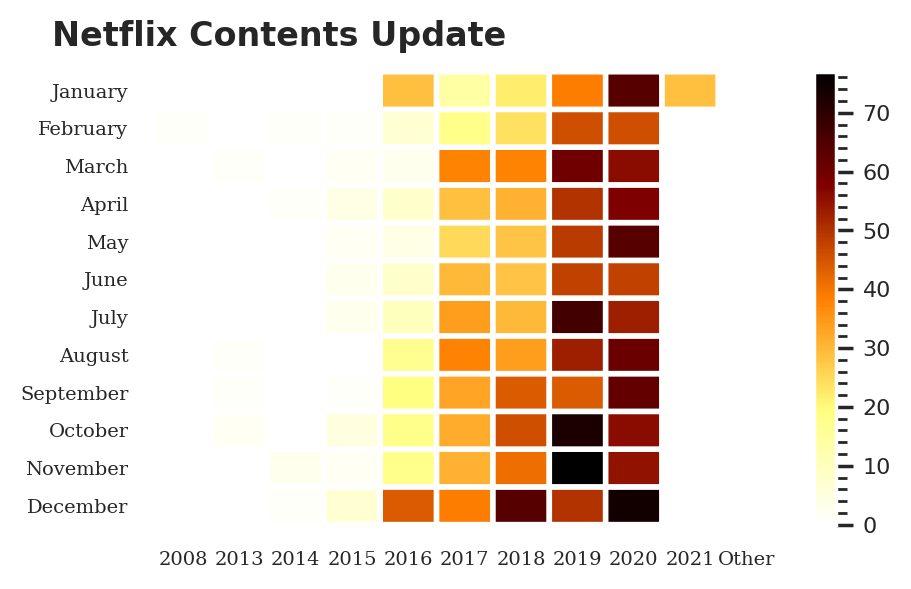

In [55]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df2 = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(5, 3), dpi=200)
plt.pcolor(df2, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df2.columns), 1), df2.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df2.index), 1), df2.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In the given years we have seen in the month of Feb, May less movies was released so producer can release on this months

Movie ratings analysis

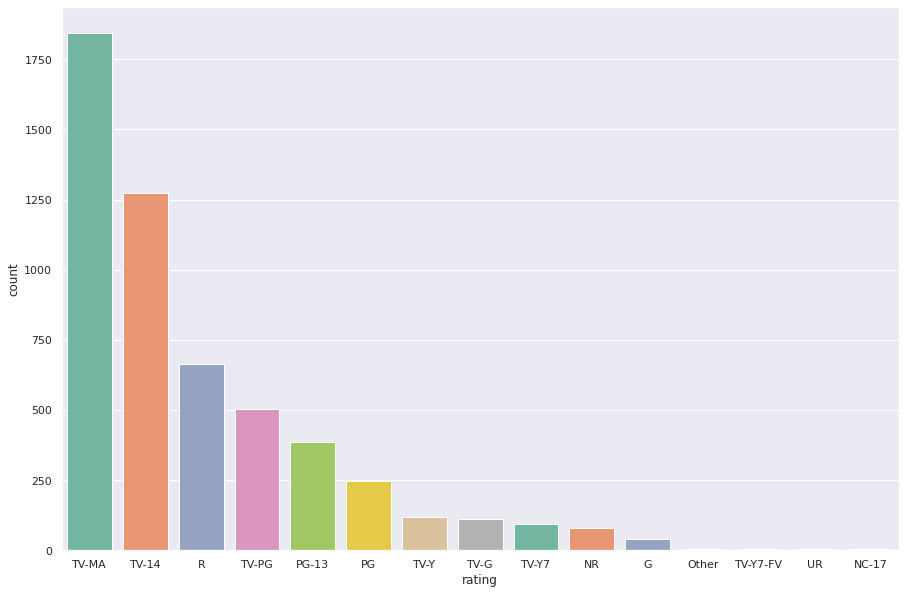

In [54]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movie, palette="Set2", order=netflix_movie['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

In [15]:
country_count=df['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:10]
topcountries

,country
[United States],2555
[India],923
[Other],507
[United Kingdom],397
[Japan],226
[South Korea],183
[Canada],177
[Spain],134
[France],115
[Egypt],101


Year wise release analysis

In [16]:
def release_year_yearly(df2):
    plt.figure(figsize=(12,10))
    ax=sns.countplot(y='release_year', data=df2, order=df2['release_year'].value_counts().index[0:18])

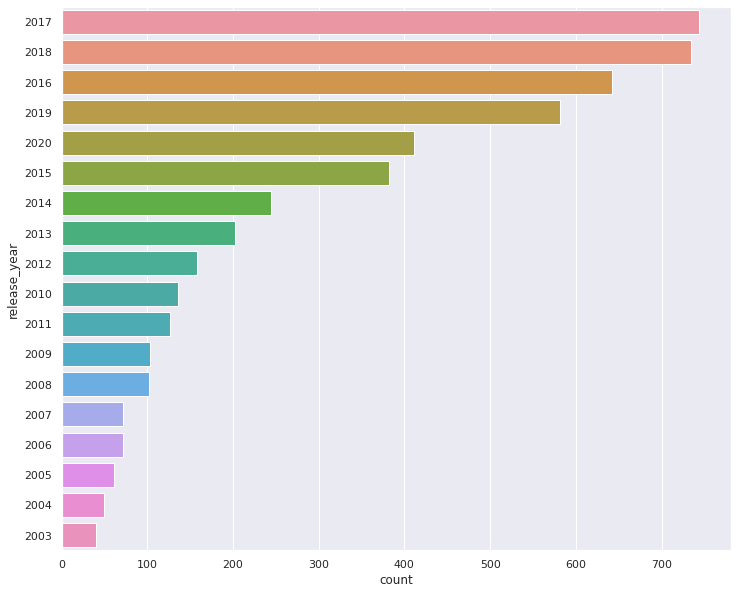

In [17]:
release_year_yearly(netflix_movie)

Highest number of movies released in Netflix was in the year 2017 and 2018

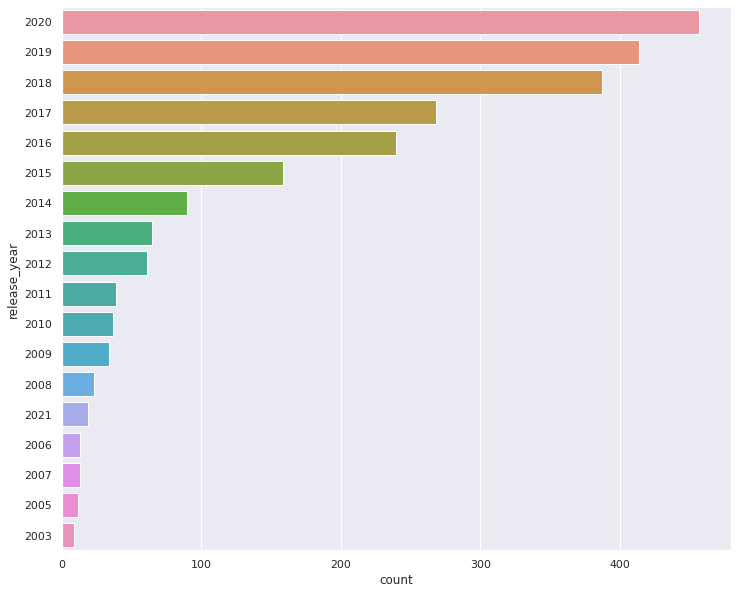

In [18]:
release_year_yearly(netflix_shows)

Highest number of Tv shows released in Netflix was in the year 2020

---



Text(0.5, 1.0, 'Top 10 Genres of Movies')

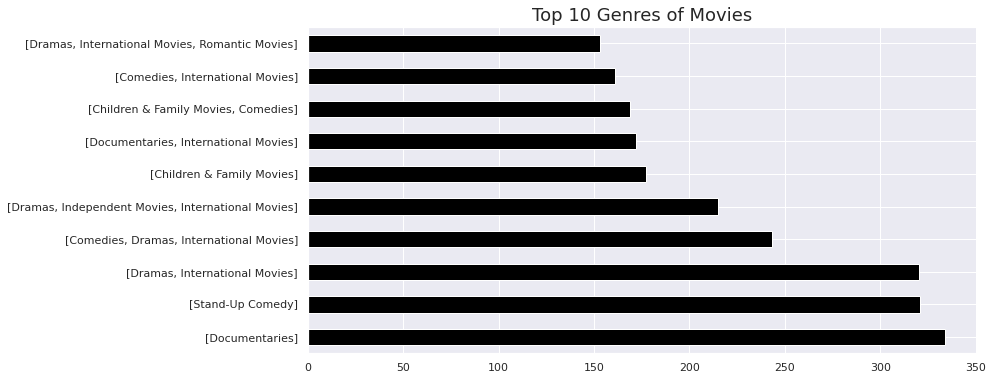

In [19]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts(sort = True)[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies", size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

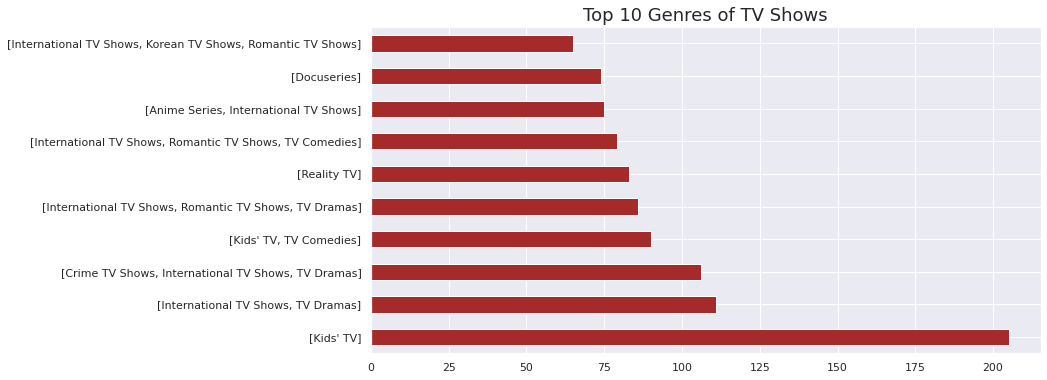

In [20]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)

# Feature Reduction

In [21]:
# Array of all unique directors, cast members, countries, ratings, and genres
all_directors = df['director'].explode().unique()
all_cast = df['cast'].explode().unique()
all_countries = df['country'].explode().unique()
all_ratings = df['rating'].unique()
all_genres = df['listed_in'].explode().unique()

len(all_directors), len(all_cast), len(all_countries), len(all_ratings),len(all_genres)

(4479, 32882, 122, 15, 42)

In [22]:
all_titles = df['title'].unique().tolist()
all_titles.sort()

In [23]:
# Retain primary director, lead actor/actress, and primary country
for inx in range(len(df)):
    df['director'][inx] = df['director'][inx][0]
    df['cast'][inx] = df['cast'][inx][0]
    df['country'][inx] = df['country'][inx][0]
    inx += 1

In [24]:
feature_reduced_df = df.copy()
feature_reduced_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Other,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


# Feature Engineering (Categorical Encoding)

In [25]:
# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [26]:
# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = feature_reduced_df.join(pd.DataFrame(mlb.fit_transform(feature_reduced_df.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=feature_reduced_df.index))

In [27]:
# Apply one-hot encoder to rating column
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_rating = pd.DataFrame(OH_encoder.fit_transform(mlb_df[['rating']]), columns=all_ratings)

# One-hot encoding removed index; put it back
OH_rating.index = mlb_df.index

# Add one-hot encoded columns to data frame
mlb_df = mlb_df.join(OH_rating)

In [28]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import category_encoders as ce

# Create the count encoder
count_enc = ce.CountEncoder()

# Count encode director, cast, and country columns
count_encoded = count_enc.fit_transform(mlb_df[['director','cast','country']])

# Rename the columns with the _count suffix, and join to dataframe
netflix_encoded_df = mlb_df.join(count_encoded.add_suffix("_count"))

In [30]:
netflix_encoded_df = netflix_encoded_df.drop(['type','title','director','cast','country','rating','description','show_id','date_added','release_year','duration'], axis=1)
netflix_encoded_df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,Other,TV-Y7,PG,G,NC-17,TV-Y7-FV,UR,director_count,cast_count,country_count
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2389,1,79
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,123
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,28
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2882
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,2882


# Clustering


# K Means Cluster Creation
Now it is time to create the Cluster

In [31]:
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

In [32]:
# Create K-Means Model
modelkmeans = KMeans(n_clusters=500, init='k-means++', n_init=10).fit(netflix_encoded_df)

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(netflix_encoded_df)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

# Attach cluster predictions to original data frame
netflix_pred = df.copy()
netflix_pred.insert(len(df.columns), column = 'cluster', value = predictions_df.cluster)

In [33]:
netflix_pred.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,Other,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,45
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,149
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",20
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi...",397
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,138


# Test K-Means Clustering Model

In [38]:
# Get cluster number from given movie or TV show
cluster_num = netflix_pred[netflix_pred.title=='The Witcher'].cluster.item()

# View cluster the movie or TV show belongs to
df[netflix_pred.cluster == cluster_num]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
63,s64,TV Show,13 Reasons Why,Other,Dylan Minnette,United States,"June 5, 2020",2020,TV-MA,4 Seasons,"[Crime TV Shows, TV Dramas, TV Mysteries]","After a teenage girl's perplexing suicide, a c..."
64,s65,TV Show,13 Reasons Why: Beyond the Reasons,Other,Dylan Minnette,United States,"August 23, 2019",2019,TV-MA,3 Seasons,"[Crime TV Shows, Docuseries]","Cast members, writers, producers and mental he..."
437,s438,TV Show,Altered Carbon,Other,Joel Kinnaman,United States,"February 27, 2020",2020,TV-MA,2 Seasons,"[Crime TV Shows, TV Action & Adventure, TV Dra...","After 250 years on ice, a prisoner returns to ..."
457,s458,TV Show,American Crime,Other,Felicity Huffman,United States,"May 30, 2017",2017,TV-MA,3 Seasons,"[Crime TV Shows, TV Dramas]",This anthology series unfolds a different stor...
458,s459,TV Show,American Crime Story: The People v. O.J. Simpson,Other,Cuba Gooding Jr.,United States,"March 6, 2019",2016,TV-MA,1 Season,"[Crime TV Shows, TV Dramas]",This anthology series dramatizes historic crim...
468,s469,TV Show,American Horror Story,Other,Evan Peters,United States,"November 13, 2020",2019,TV-MA,9 Seasons,"[TV Horror, TV Mysteries, TV Thrillers]",This twisted Emmy-winning drama plays upon the...
543,s544,TV Show,Another Life,Other,Katee Sackhoff,United States,"July 25, 2019",2019,TV-MA,1 Season,"[TV Action & Adventure, TV Dramas, TV Mysteries]","After a massive alien artifact lands on Earth,..."
565,s566,TV Show,Aquarius,Other,David Duchovny,United States,"June 16, 2017",2016,TV-MA,2 Seasons,"[Crime TV Shows, TV Dramas]","Amid the turmoil of 1960s LA, two cops and a p..."
761,s762,TV Show,Bates Motel,Other,Vera Farmiga,United States,"February 20, 2018",2017,TV-MA,5 Seasons,"[Crime TV Shows, TV Dramas, TV Horror]","When his father dies, Norman Bates and his mot..."
858,s859,TV Show,Better Call Saul,Other,Bob Odenkirk,United States,"February 9, 2020",2018,TV-MA,4 Seasons,"[Crime TV Shows, TV Comedies, TV Dramas]","This Emmy-nominated prequel to ""Breaking Bad"" ..."


# WORD CLOUD

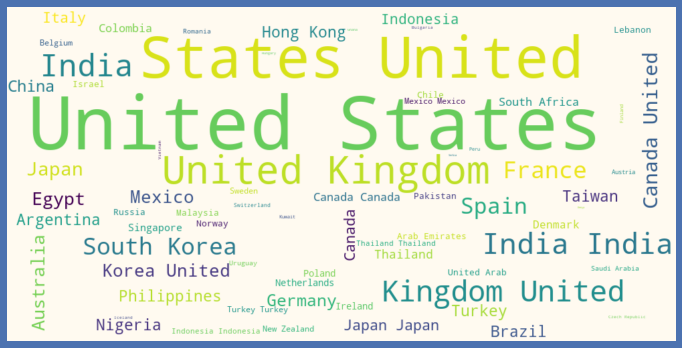

In [40]:
fig = plt.figure(figsize=(10,5),facecolor = 'b',edgecolor = 'r')
wordcloud = WordCloud(background_color='floralwhite',width=1000, height=500 ).generate(" ".join(df.country))
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

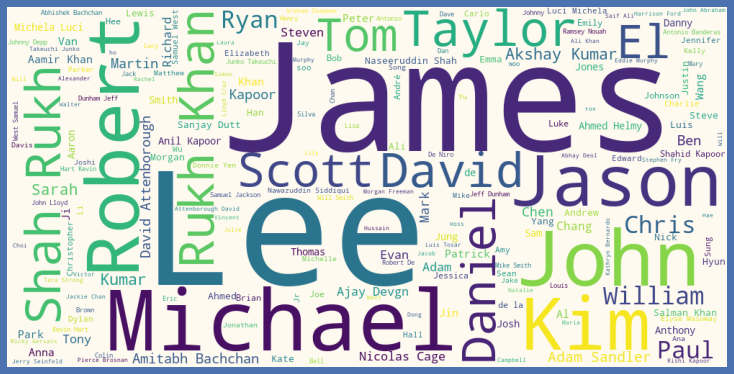

In [42]:
text = df['cast']
wordcloud = WordCloud(width = 1000,height = 500,background_color = 'floralwhite').generate(" ".join(df.cast))
fig = plt.figure(figsize = (10, 5),facecolor = 'b',edgecolor = 'k',)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

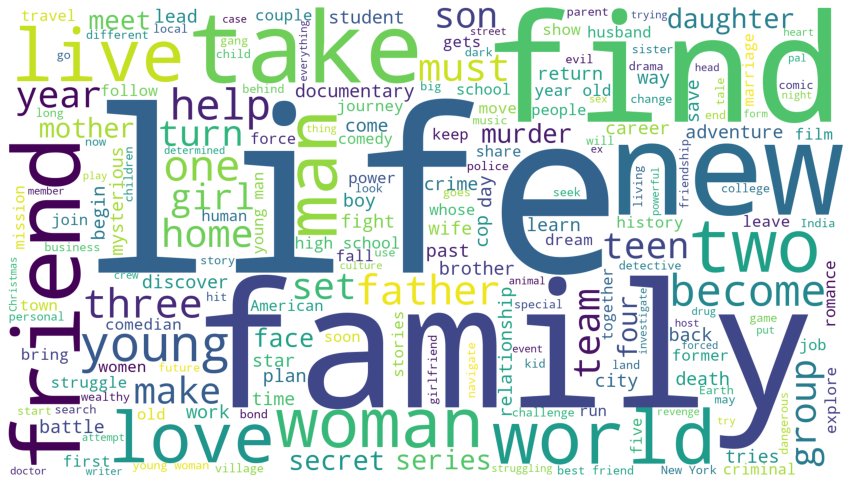

In [53]:
plt.subplots(figsize=(15,9))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Conclusion :

The largest count of movies are made with the 'TV-MA' rating. "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Highest number of movies released in Netflix was in the year 2017 and 2018

Highest number of Tv shows released in Netflix was in the years 2018, 2019, and 2020.

The months of October, November, December and January had the largest number of films and television series released.

In the given years we have seen in the month of Feb, May less movies was released so producer can release on this months

There are about 70% movies and 30% TV shows on Netflix.

The United States has the highest number of content on Netflix by a huge margin followed by India.

Raul Campos and Jan Sulter collectively have directed the most content on Netflix.

James, Lee, Michael, Daniel, John, etc have casted in most of the content on Netflix.

Anupam Kher has acted in the highest number of films on Netflix. Drama is the most popular genre followed by comedy.

More of the content is released in holiday season - October, November, December and January.

The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.

The most frequent words used in description  are LIFE, FAMILY, WOMEN, FATHER, LOVE, FRIEND, etc.